## Active Matter Analysis

In [15]:
#Libraries
import numpy as np
import matplotlib.pyplot
import os
import re
import matplotlib.pyplot as plt

In [16]:
#folders with data of simulations
folder0 = 'C-sim_modified/'
folder1 = 'CONF/'
files = os.listdir(folder0 + folder1)

In [17]:
#parameters
nsteps = 200
N = 400
N0 = 1
N_tot = N+N0

#initial position of the probe
x0 = 10.
y0 = 10.

#hyperparameters
PLOT = True


In [18]:
#ANALYSIS
f_list = []
MSD_list = []
j=1
for file in files:

    print('File {} out of {}'.format(j, len(files)))
    j+=1

    #extracting f_active from filename
    pattern_f_active = r"f_active(.*?)_"
    f_active = float(re.findall(pattern_f_active, file)[0])

    #loading the data
    data = np.loadtxt(folder0 + folder1 +file)

    #removing unuseful lines
    index_to_remove = np.concatenate([np.arange(nsteps)*(N_tot+2), np.arange(1, nsteps+1)*(N_tot+2)-1])

    #cleaning the data
    data = np.delete(data, index_to_remove, axis = 0)

    #reshaping the data
    x = data[:, 0]
    y = data[:, 1]
    x = x.reshape((nsteps, N_tot))
    y = y.reshape((nsteps, N_tot))

    x_prob = x[:, 0]
    y_prob = y[:, 0]

    MSD =(x_prob-x_prob[0])**2 + (y_prob-y_prob[0])**2

    f_list.append(f_active)
    MSD_list.append(MSD)

    if f_active == 0. or f_active==6.0 and PLOT:
        for t in [0, 100, -1]:

            plt.figure()

            for i in np.arange(1, N_tot, 2):
                if (np.sqrt((x[t, i]-x[t,i+1])**2+ (y[t, i]-y[t,i+1])**2)<10):
                    plt.plot(x[t, i:i+2], y[t, i:i+2], '.-', color = 'black', linewidth = 0.5)
                else:
                    plt.plot(x[t, i:i+2], y[t, i:i+2], '.', color = 'black', linewidth = 0.5)

            plt.scatter(x[t, 0], y[t, 0], color = 'red', s = 10)

            plt.xlabel('x')
            plt.ylabel('y')

            plt.title(r'$f = {}$, $\lambda = 0.5$'.format(f_active))
            plt.savefig('plots/f_active{}_step{}.png'.format(f_active, t))
            plt.close()

MSD_list = np.array(MSD_list)
f_list = np.array(f_list)

File 1 out of 60
File 2 out of 60


File 3 out of 60
File 4 out of 60
File 5 out of 60
File 6 out of 60
File 7 out of 60
File 8 out of 60
File 9 out of 60
File 10 out of 60
File 11 out of 60
File 12 out of 60
File 13 out of 60
File 14 out of 60
File 15 out of 60
File 16 out of 60
File 17 out of 60
File 18 out of 60
File 19 out of 60
File 20 out of 60
File 21 out of 60
File 22 out of 60
File 23 out of 60
File 24 out of 60
File 25 out of 60
File 26 out of 60
File 27 out of 60
File 28 out of 60
File 29 out of 60
File 30 out of 60
File 31 out of 60
File 32 out of 60
File 33 out of 60
File 34 out of 60
File 35 out of 60
File 36 out of 60
File 37 out of 60
File 38 out of 60
File 39 out of 60
File 40 out of 60
File 41 out of 60
File 42 out of 60
File 43 out of 60
File 44 out of 60
File 45 out of 60
File 46 out of 60
File 47 out of 60
File 48 out of 60
File 49 out of 60
File 50 out of 60
File 51 out of 60
File 52 out of 60
File 53 out of 60
File 54 out of 60
File 55 out of 60
File 56 out of 60
File 57 out of 60
File 58 out of 60

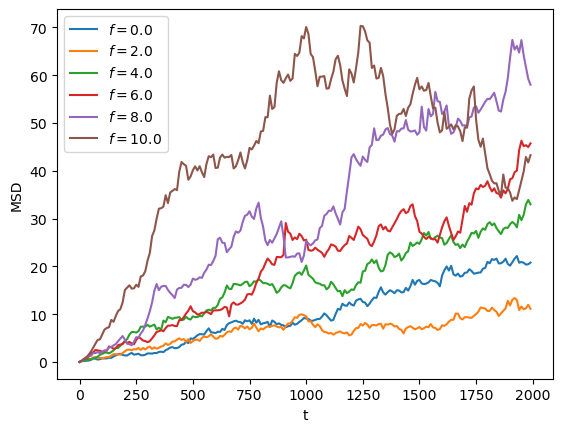

In [19]:
#PLOT
time = np.arange(nsteps)*10

for f in np.unique(f_list):
    index = np.where(f_list == f)[0]
    MSD = np.mean(MSD_list[index, :], axis = 0)
    plt.plot(time, MSD, label = r'$f = {}$'.format(f))

plt.xlabel('t')
plt.ylabel('MSD')
plt.legend()

plt.savefig('plots/MSD.png')
